# **LOAD DATA**

As done in previous attempt

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import itertools
import numpy as np
import os
import shutil
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/flowers_new/archive.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [ ]:
base_direct = '/tmp/dataset/Flowers_Dataset_Revised/Flowers_Dataset_Revised/newFlowers/'
daisy_direct = base_direct + 'daisy/'
dandelion_direct = base_direct + 'dandelion/'
rose_direct = base_direct + 'rose/'
sunflower_direct = base_direct + 'sunflower/'
tulip_direct = base_direct + 'tulip/'

train_direct = '/tmp/dataset/flowers/train/'
valid_direct = '/tmp/dataset/flowers/valid/'
test_direct = '/tmp/dataset/flowers/test/'

In [ ]:
print('all daisy images: ', len(os.listdir(daisy_direct)))
print('all dandelion images: ', len(os.listdir(dandelion_direct)))
print('all rose images: ', len(os.listdir(rose_direct)))
print('all sunflower images: ', len(os.listdir(sunflower_direct)))
print('all tuplip images: ', len(os.listdir(tulip_direct)))

all daisy images:  746
all dandelion images:  1028
all rose images:  728
all sunflower images:  698
all tuplip images:  935


In [ ]:
folder_names = [ 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
dataset_direct='/tmp/dataset/flowers/'
dataset_direct_train = dataset_direct + 'train/'
dataset_direct_valid = dataset_direct + 'valid/'
dataset_direct_test = dataset_direct + 'test/'

In [ ]:
import os, shutil
def clear_directory(folder):
#folder = '/tmp/dataset/flowers/train/tulip'
  for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [ ]:
if os.path.exists(dataset_direct_train):
  for name in folder_names:
    clear_directory(dataset_direct_train+name)
  for name in folder_names:
    os.rmdir(dataset_direct_train+name)

  os.rmdir(dataset_direct+'train')

if os.path.exists(dataset_direct_valid):
  for name in folder_names:
    clear_directory(dataset_direct_valid+name)
  for name in folder_names:
    os.rmdir(dataset_direct_valid+name)
  os.rmdir(dataset_direct+'valid')

if os.path.exists(dataset_direct_test):
  for name in folder_names:
    clear_directory(dataset_direct_test+name)
  for name in folder_names:
    os.rmdir(dataset_direct_test+name)
  os.rmdir(dataset_direct+'test')




In [ ]:
if not os.path.exists('/tmp/dataset/flowers'):
    os.makedirs('/tmp/dataset/flowers')

os.chdir('/tmp/dataset/flowers')
if os.path.isdir('train/daisy') is False:
  os.makedirs('train/daisy')
  os.makedirs('train/dandelion')
  os.makedirs('train/rose')
  os.makedirs('train/sunflower')
  os.makedirs('train/tulip')
  
  os.makedirs('valid/daisy')
  os.makedirs('valid/dandelion')
  os.makedirs('valid/rose')
  os.makedirs('valid/sunflower')
  os.makedirs('valid/tulip')

  os.makedirs('test/daisy')
  os.makedirs('test/dandelion')
  os.makedirs('test/rose')
  os.makedirs('test/sunflower')
  os.makedirs('test/tulip')



In [ ]:
folder_names[:5]

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
for flower_type in folder_names[:5]:
  img_list = os.listdir(base_direct+flower_type)
  for img in random.sample(img_list, round(len(os.listdir(base_direct+flower_type))*0.7)):
    shutil.move(base_direct+flower_type+'/'+img, train_direct+flower_type)
  img_list = os.listdir(base_direct+flower_type)
  for img in random.sample(img_list, round(len(os.listdir(base_direct+flower_type))*0.66666)):
    shutil.move(base_direct+flower_type+'/'+img, valid_direct+flower_type)
  
  source_dir = base_direct+flower_type +'/'
  target_dir = test_direct+flower_type +'/'
  file_names = os.listdir(source_dir)

  for file_name in file_names:
    shutil.move(source_dir+file_name, target_dir)

In [ ]:
print('train daisy images: ', len(os.listdir(train_direct+'daisy')))
print('valid daisy images: ', len(os.listdir(valid_direct+'daisy')))
print('test daisy images: ', len(os.listdir(test_direct+'daisy')))

train daisy images:  522
valid daisy images:  149
test daisy images:  75


In [ ]:
images = random.sample(os.listdir(valid_direct+'rose'),20)

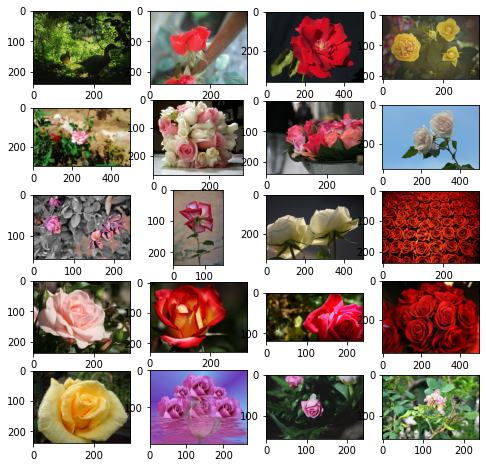

In [ ]:
import cv2
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(0, columns*rows ):
    IMG = cv2.imread(valid_direct+'rose/'+images[i])
    RGB_img = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(RGB_img)
plt.show()

# **Images Preperation - Preprocessed Data**

In [ ]:
batch_size = 8
num_of_epochs = 30

In [ ]:
train_prep = ImageDataGenerator(rescale=1/255)
valid_prep = ImageDataGenerator(rescale=1/255)
test_prep = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train_prep.flow_from_directory(
    dataset_direct_train,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

valid_dataset = valid_prep.flow_from_directory(
    dataset_direct_valid,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

test_prep = ImageDataGenerator(rescale=1/255)

test_dataset = test_prep.flow_from_directory(
    dataset_direct_test,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 2895 images belonging to 5 classes.
Found 825 images belonging to 5 classes.
Found 415 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

# **Show Preprocessed Data**

In [ ]:
imgs, labels = next(train_dataset)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed 
def plotImages(images_arr):
  fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

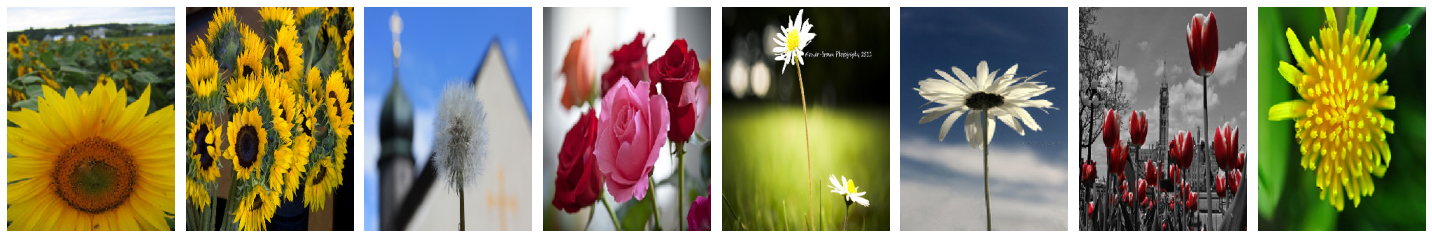

[3. 3. 1. 2. 0. 0. 4. 1.]


In [ ]:
plotImages(imgs)
print(labels)

# **Confusion Matrix - function**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting 'normalization=True'
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title),
  plt.colorbar(),
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('COnfusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# **Data Augmentation** (Not finished)

In [ ]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, 
                         shear_range=0.15, zoom_range=0.1, channel_shift_range=10.,
                         horizontal_flip=True)

dataset_direct_train | folder_names

In [ ]:
# this function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

In [ ]:
chosen_image = random.choice(os.listdir(dataset_direct_train+folder_names[0]))

In [ ]:
image_path = dataset_direct_train+folder_names[0] + '/' + chosen_image

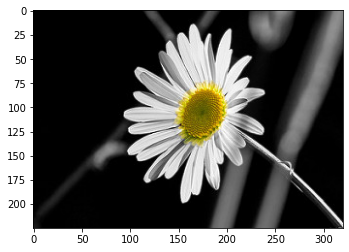

In [ ]:
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [ ]:
# Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [ ]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

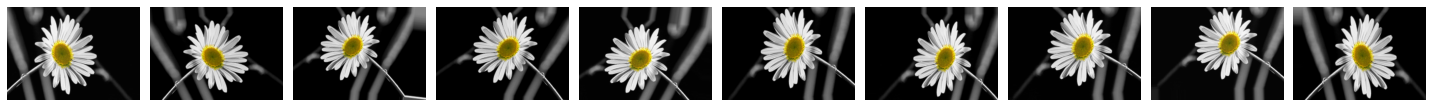

In [ ]:
plotImages(aug_images)

In [ ]:
for flower in folder_names:
  for img in dataset_direct_train + flower:
    img_path = dataset_direct_train + flower + '/' + img
    image = np.expand_dims(plt.imread(image_path),0)
    aug_iter = gen.flow(image)
    for index in range(5):
      next(aug_iter)[0][index].astype(np.uint8).save(dataset_direct_train + flower + '/' + img + '/' + index)

AttributeError: ignored